In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.shape


(5110, 12)

In [2]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
df=df.drop(['id'], axis=1)
df=df.dropna(subset = ["bmi"])
df=df.drop(df[df["gender"]=="Other"].index)
df['age']=df['age'].astype('int')
df=df.drop(df[(df["stroke"]==1)& (df["age"]<10)].index)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   int32  
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 601.0+ KB


In [4]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [5]:
df['smoking_status'] = df['smoking_status'].apply(smoke)
df['stroke'].value_counts()
X = df.drop('stroke',axis=1)
y = df["stroke"]

In [6]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)   
    plt.ylabel('PR_Auc score')
    plt.legend(loc='best')
    plt.show()

In [7]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [8]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('PR_Auc score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [32]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)
scaler=StandardScaler()
one_hot_encoder=OneHotEncoder()

numercial_cols=['age', 'bmi', 'avg_glucose_level']
catergorical_cols=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

data_prep=make_column_transformer((make_pipeline(scaler), numercial_cols),
                                  (make_pipeline(one_hot_encoder), catergorical_cols),
                                  remainder="passthrough")

s_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)





In [29]:
from sklearn.tree import DecisionTreeClassifier
X_train = data_prep.fit_transform(X_train)
print(X_train)
dt = DecisionTreeClassifier(class_weight='balanced',random_state=40)
dt.fit(X_train, y_train)
print(dt.feature_importances_)

[[ 0.49024715  1.29609187 -0.79693634 ...  1.          0.
   0.        ]
 [-1.06407679 -0.3963303  -0.41765164 ...  0.          0.
   0.        ]
 [-0.97525828 -0.52358008 -0.63341646 ...  0.          0.
   0.        ]
 ...
 [-0.84203051 -0.56175502 -0.48278819 ...  0.          0.
   0.        ]
 [-0.17589168 -0.67627983 -0.34640854 ...  0.          0.
   0.        ]
 [-0.17589168  1.79236604 -0.29642529 ...  0.          0.
   0.        ]]
[0.46040923 0.1963695  0.20808607 0.01630964 0.00683655 0.00113219
 0.0036085  0.01833599 0.         0.02116956 0.01453108 0.
 0.00306172 0.00303108 0.00452367 0.00901279 0.02855582 0.0050266 ]


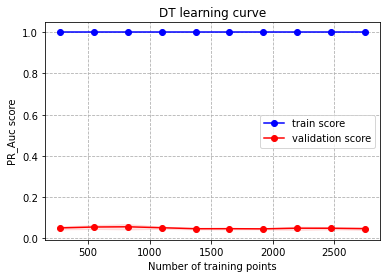

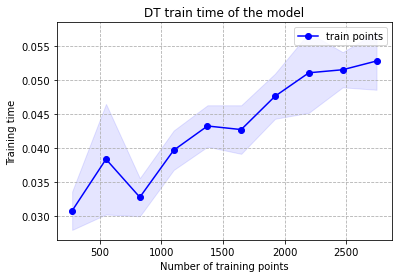

DT: PR-Auc= 0.115
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1410
           1       0.10      0.10      0.10        63

    accuracy                           0.92      1473
   macro avg       0.53      0.53      0.53      1473
weighted avg       0.92      0.92      0.92      1473

[[1354   56]
 [  57    6]]


In [11]:
pipeline = make_pipeline(data_prep,DecisionTreeClassifier(class_weight='balanced',random_state=40))

train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='average_precision',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'DT learning curve')
plot_train_time_curve(train_sizes, fit_times, 'DT train time of the model')


from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate pr auc
y_pred = pipeline.predict(X_test)
yhat = pipeline.predict_proba(X_test)
pos_probs = yhat[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
# summarize scores
print('DT: PR-Auc= %.3f' %  auc(lr_recall, lr_precision))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [21]:
print(pipeline.steps[1][1].get_params())
print(pipeline.steps[1][1].get_depth())
importance = pipeline.steps[1][1].feature_importances_
print(importance)

{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 40, 'splitter': 'best'}
21
[0.46040923 0.1963695  0.20808607 0.01630964 0.00683655 0.00113219
 0.0036085  0.01833599 0.         0.02116956 0.01453108 0.
 0.00306172 0.00303108 0.00452367 0.00901279 0.02855582 0.0050266 ]


In [37]:
from sklearn.model_selection import GridSearchCV
pipeline = make_pipeline(data_prep,oversample,DecisionTreeClassifier(class_weight='balanced',random_state=40))
ccp_alpha_range = list(np.arange(.0, .01, .001))
max_depth_range = list(range(1,5,1))
criterion=['entropy', 'gini']
parameters = dict(decisiontreeclassifier__ccp_alpha=ccp_alpha_range,decisiontreeclassifier__max_depth=max_depth_range,decisiontreeclassifier__criterion=criterion)
grid_search_cv = GridSearchCV(pipeline, parameters,cv=s_kfold,scoring='average_precision')
grid_search_cv.fit(X_train, y_train)
print("Tuned dt best params: {}".format(grid_search_cv.best_params_))


Tuned dt best params: {'decisiontreeclassifier__ccp_alpha': 0.004, 'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5}


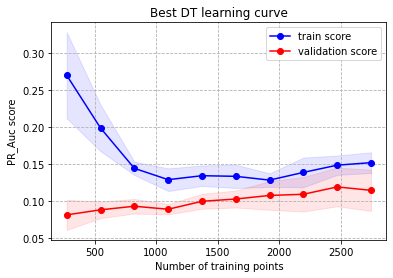

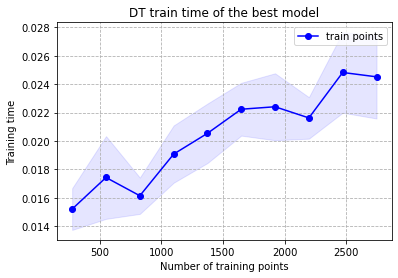

DT: Predict Time= 0.011
DT: PR-Auc= 0.314
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1410
           1       0.12      0.81      0.21        63

    accuracy                           0.75      1473
   macro avg       0.56      0.78      0.53      1473
weighted avg       0.95      0.75      0.82      1473

[[1049  361]
 [  12   51]]


In [18]:
from sklearn.metrics import precision_recall_curve, auc, classification_report, confusion_matrix

best_pipeline = make_pipeline(data_prep,DecisionTreeClassifier(random_state=40,class_weight='balanced',ccp_alpha=0.004, max_depth=3,criterion='entropy'))
train_sizes, train_scores, test_scores,fit_times, _ = learning_curve(estimator=best_pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold, scoring='average_precision',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
plot_learning_curve(train_sizes, train_scores, test_scores,'Best DT learning curve')
plot_train_time_curve(train_sizes, fit_times, 'DT train time of the best model')

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix,precision_recall_curve,plot_precision_recall_curve
best_pipeline.fit(X_train, y_train)

# calculate pr auc
import time
start = time.time()
y_pred = best_pipeline.predict(X_test)
yhat = best_pipeline.predict_proba(X_test)
diff=time.time() - start
print('DT: Predict Time= %.3f' %  diff)
pos_probs = yhat[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pos_probs)
# summarize scores
print('DT: PR-Auc= %.3f' %  auc(lr_recall, lr_precision))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


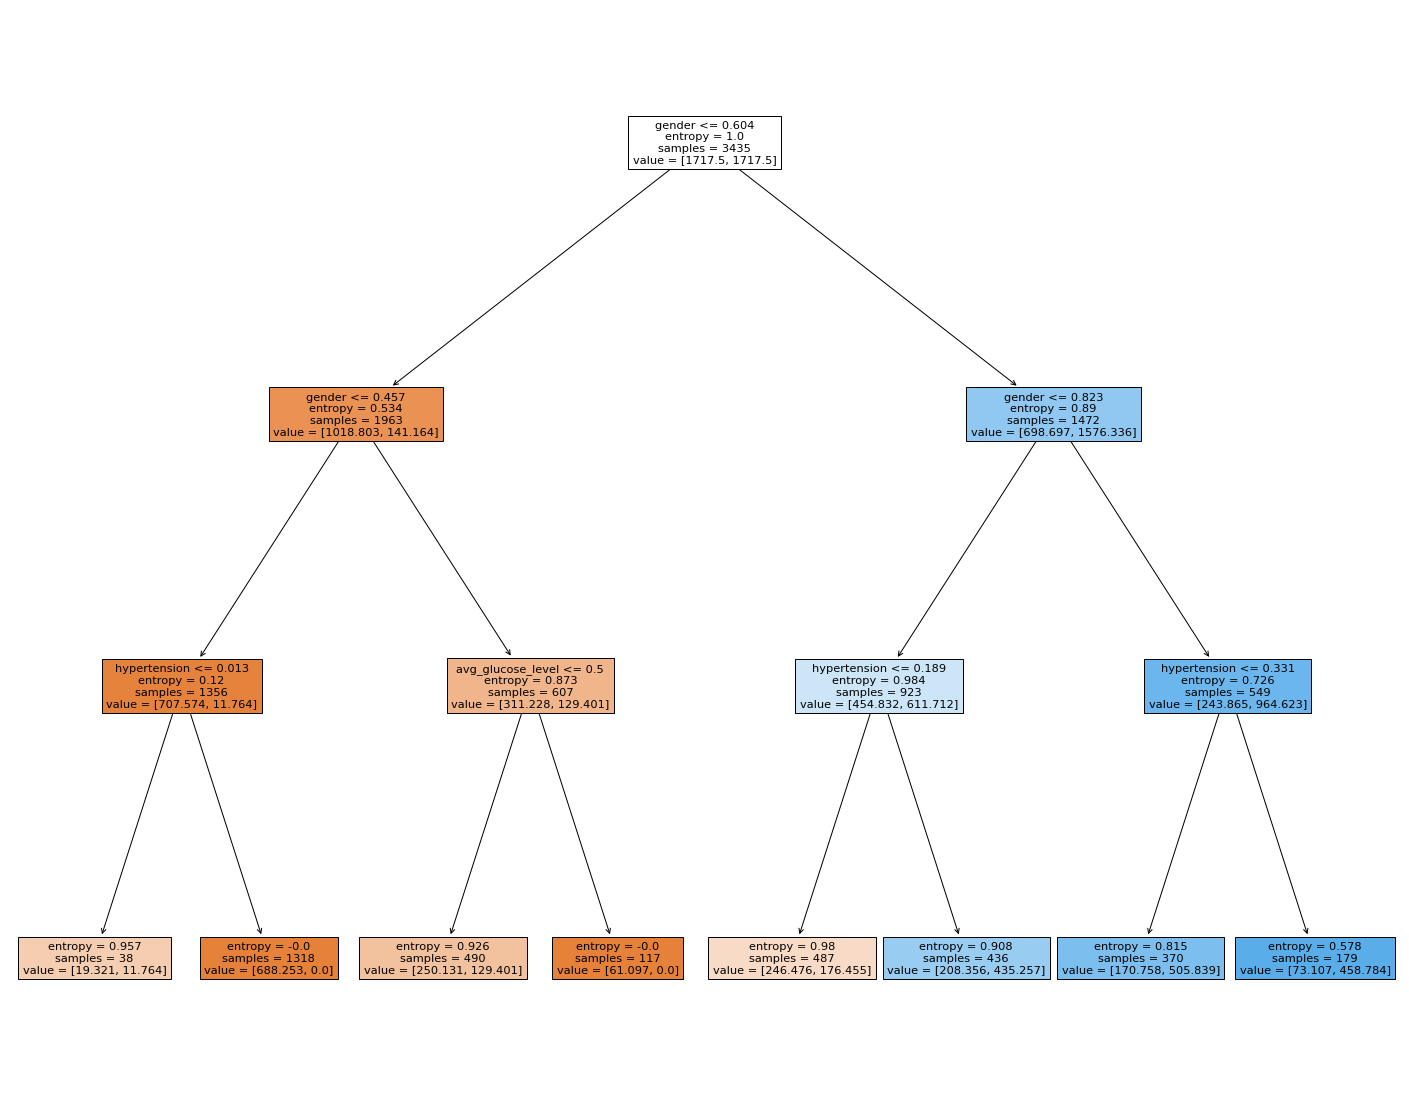

In [25]:
from sklearn import tree
#tree.plot_tree(best_pipeline.steps[1][1])
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_pipeline.steps[1][1], 
                   feature_names=X.columns,  
                   filled=True)



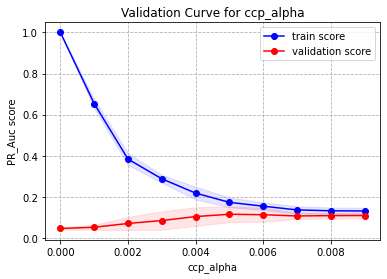

In [34]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,DecisionTreeClassifier(class_weight='balanced',random_state=40))
ccp_alpha_range = list(np.arange(.0, .01, .001))
train_scores, test_scores = validation_curve(
        estimator= pipeline, X=X_train, y=y_train, param_name="decisiontreeclassifier__ccp_alpha", param_range=ccp_alpha_range,
        cv=s_kfold, scoring="average_precision", n_jobs=-1)
plot_validation_curve(ccp_alpha_range, train_scores, test_scores, 'ccp_alpha', title="Validation Curve for ccp_alpha", alpha=0.1)

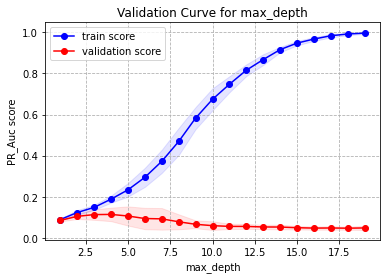

In [35]:
from sklearn.model_selection import validation_curve
pipeline = make_pipeline(data_prep,DecisionTreeClassifier(class_weight='balanced',random_state=40))
max_depth_range = list(range(1,20,1))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_train, y=y_train, param_name="decisiontreeclassifier__max_depth", param_range=max_depth_range,
        cv=s_kfold, scoring="average_precision", n_jobs=-1)
plot_validation_curve(max_depth_range, train_scores, test_scores,'max_depth', title="Validation Curve for max_depth", alpha=0.1)

In [11]:
conda list -e > requirements.txt


Note: you may need to restart the kernel to use updated packages.
